In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline

In [3]:
rating = pd.read_csv('movie_data/ratings_small.csv')

In [4]:
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [5]:
reader = Reader()
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [6]:
probmf_svd = SVD(biased = False)
cv_probmf = cross_validate(probmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0071  1.0098  1.0027  1.0114  1.0067  1.0075  0.0030  
MAE (testset)     0.7778  0.7779  0.7743  0.7814  0.7798  0.7783  0.0024  
Fit time          1.03    1.07    1.12    1.03    1.01    1.05    0.04    
Test time         0.14    0.19    0.12    0.20    0.12    0.15    0.04    


In [7]:
print('MAE and PMF average for Collaborative Filtering is  ', cv_probmf['test_mae'].mean())
print('RMSE and PMF average for Collaborative Filtering is ', cv_probmf['test_rmse'].mean())

MAE and PMF average for Collaborative Filtering is   0.7782502676707393
RMSE and PMF average for Collaborative Filtering is  1.007542863744435


In [8]:
sim_options = {'user_based': True}
user_colf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_colf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9763  0.9604  0.9668  0.9704  0.9619  0.9672  0.0058  
MAE (testset)     0.7517  0.7371  0.7421  0.7460  0.7410  0.7436  0.0050  
Fit time          0.12    0.13    0.13    0.13    0.13    0.13    0.01    
Test time         1.41    1.33    1.36    1.34    1.35    1.36    0.03    


In [9]:
print('MAE Average for Userbased collaborative filtering is  ', cv_ub['test_mae'].mean())
print('RMSE Average for Userbased collaborative filtering is  ', cv_ub['test_rmse'].mean())

MAE Average for Userbased collaborative filtering is   0.7435993387651367
RMSE Average for Userbased collaborative filtering is   0.9671579637156764


In [37]:
sim_options = {'user_based': False}
item_based_colf = KNNBasic(sim_options=sim_options)
cv_itb = cross_validate(item_based_colf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9402  0.9322  0.9295  0.9351  0.9362  0.9346  0.0037  
MAE (testset)     0.7250  0.7197  0.7188  0.7203  0.7204  0.7208  0.0022  
Fit time          3.89    3.56    3.14    3.21    3.19    3.40    0.29    
Test time         6.20    6.54    7.03    6.65    6.97    6.68    0.30    


In [38]:
print('MAE Average for Itembased collaborative filtering is ', cv_itb['test_mae'].mean())
print('RMSE Average for Itembased collaborative filtering is ', cv_itb['test_rmse'].mean())

MAE Average for Itembased collaborative filtering is  0.72083464429192
RMSE Average for Itembased collaborative filtering is  0.9346352456333313


In [10]:
#Cosine
sim_options = {'name':'cosine', 'user_based': True}
usb_cosine = KNNBasic(sim_options=sim_options);
cv_usb_cos = cross_validate(usb_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9950  0.9918  0.9923  0.9949  0.9941  0.9936  0.0013  
MAE (testset)     0.7678  0.7643  0.7683  0.7691  0.7676  0.7674  0.0017  
Fit time          0.17    0.18    0.18    0.19    0.18    0.18    0.01    
Test time         1.34    1.34    1.33    1.43    1.31    1.35    0.04    


In [11]:
#MSD
sim_options = {'name':'msd', 'user_based': True}
usb_msd = KNNBasic(sim_options=sim_options);
cv_usb_msd = cross_validate(usb_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9715  0.9611  0.9689  0.9778  0.9593  0.9677  0.0068  
MAE (testset)     0.7452  0.7396  0.7470  0.7480  0.7405  0.7441  0.0034  
Fit time          0.11    0.17    0.14    0.13    0.13    0.14    0.02    
Test time         1.37    1.34    1.34    1.44    1.33    1.36    0.04    


In [12]:
#Pearson
sim_options = {'name':'pearson', 'user_based': True}
usb_pearson = KNNBasic(sim_options=sim_options);
cv_usb_pearson = cross_validate(usb_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9921  0.9954  0.9978  1.0023  0.9975  0.9970  0.0033  
MAE (testset)     0.7687  0.7696  0.7728  0.7764  0.7698  0.7715  0.0028  
Fit time          0.24    0.28    0.25    0.24    0.25    0.25    0.02    
Test time         1.46    1.45    1.33    1.34    1.33    1.38    0.06    


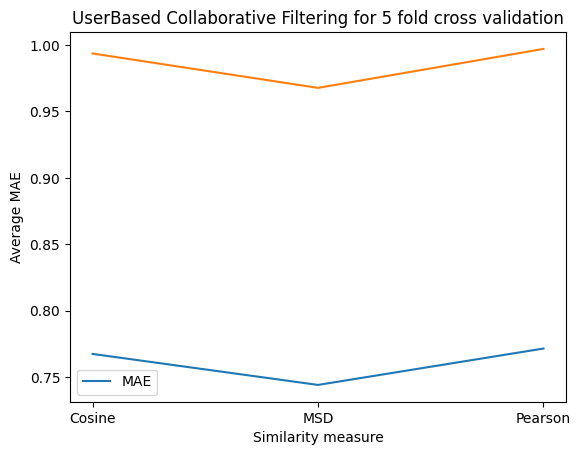

In [13]:
#Observation
x = [0,1,2]
y_mae = [cv_usb_cos['test_mae'].mean(),cv_usb_msd['test_mae'].mean(),cv_usb_pearson['test_mae'].mean()]
y_rmse = [cv_usb_cos['test_rmse'].mean(),cv_usb_msd['test_rmse'].mean(),cv_usb_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.legend(['MAE','RMSE'])
plt.title('UserBased Collaborative Filtering for 5 fold cross validation')
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity measure')
plt.ylabel('Average MAE')
plt.show()


In [32]:
# #Observation
# x = [0,1,2]
# y_rmse = [cv_usb_cos['test_rmse'].mean(),cv_usb_msd['test_rmse'].mean(),cv_usb_pearson['test_rmse'].mean()]
# plt.plot(x, y_rmse)
# plt.title('UserBased Collaborative Filtering for 5 fold cross validation')
# plt.legend(['RMSE'])
# plt.xticks(x,['Cosine','MSD','Pearson'])
# plt.xlabel('Similarity measure')
# plt.ylabel('Average RMSE')
# plt.show()

In [15]:
#Item-based CF
#Cosine
sim_options = {'name':'cosine', 'user_based': False}
itb_cos = KNNBasic(sim_options=sim_options);
cv_itb_cos = cross_validate(itb_cos, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9988  0.9976  0.9928  0.9923  0.9927  0.9949  0.0028  
MAE (testset)     0.7793  0.7776  0.7701  0.7701  0.7743  0.7743  0.0038  
Fit time          6.20    4.74    4.53    4.60    4.90    5.00    0.62    
Test time         5.85    6.29    6.30    6.48    6.24    6.23    0.21    


In [16]:
#MSD
sim_options = {'name':'msd', 'user_based': False}
itb_msd = KNNBasic(sim_options=sim_options);
cv_itb_msd = cross_validate(itb_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9337  0.9372  0.9306  0.9410  0.9353  0.9356  0.0035  
MAE (testset)     0.7221  0.7209  0.7197  0.7226  0.7220  0.7215  0.0011  
Fit time          2.92    3.23    3.15    3.16    3.16    3.12    0.11    
Test time         6.22    6.44    6.43    6.29    6.82    6.44    0.21    


In [17]:
#Pearson
sim_options = {'name':'pearson', 'user_based': False}
itb_pearson = KNNBasic(sim_options=sim_options);
cv_itb_pearson = cross_validate(itb_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9920  0.9892  0.9946  0.9909  0.9807  0.9895  0.0047  
MAE (testset)     0.7686  0.7673  0.7712  0.7730  0.7620  0.7684  0.0038  
Fit time          8.21    6.73    6.50    7.06    6.81    7.06    0.60    
Test time         6.14    6.33    6.17    6.24    6.39    6.25    0.09    


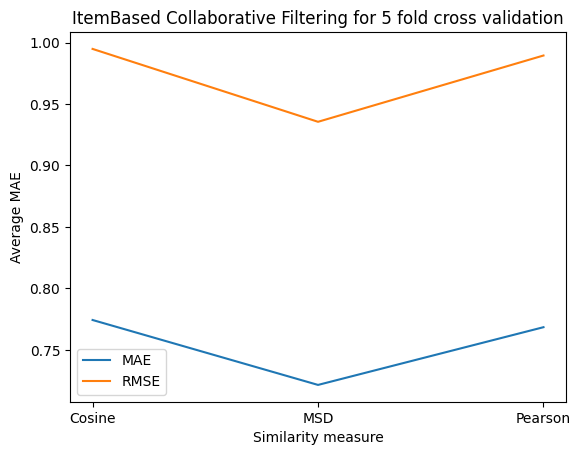

In [31]:
#Observation1 for MAE
x = [0,1,2]
y_mae = [cv_itb_cos['test_mae'].mean(),cv_itb_msd['test_mae'].mean(),cv_itb_pearson['test_mae'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('ItemBased Collaborative Filtering for 5 fold cross validation')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity measure')
plt.ylabel('Average MAE')
plt.show()


In [29]:
# #Observation2 for RMSE
# x = [0,1,2]
# y_rmse = [cv_itb_cos['test_rmse'].mean(),cv_itb_msd['test_rmse'].mean(),cv_itb_pearson['test_rmse'].mean()]
# plt.plot(x, y_rmse)
# plt.title('ItemBased Collaborative Filtering for 5 fold cross validation')
# plt.legend(['RMSE'])
# plt.xticks(x,['Cosine','MSD','Pearson'])
# plt.xlabel('Similarity measure')
# plt.ylabel('Average RMSE')
# plt.show()


In [20]:
#Number of neighbours
trainDaset, testDaset = train_test_split(data, test_size = 0.2, random_state = 42)

In [21]:
#User Based CF
usbc_nn_mae = []
usbc_nn_rmse = []
k1 = list(np.arange(1,20,1))
for i in k1:
  usbc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  usbc_nn.fit(trainDaset)
  predictions = usbc_nn.test(testDaset)
  usbc_nn_mae.append(accuracy.mae(predictions))
  usbc_nn_rmse.append(accuracy.rmse(predictions))


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8978
RMSE: 1.1999
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8152
RMSE: 1.0668
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7862
RMSE: 1.0232
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7681
RMSE: 0.9988
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7578
RMSE: 0.9861
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7514
RMSE: 0.9784
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7460
RMSE: 0.9720
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7429
RMSE: 0.9683
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7408
RMSE: 0.9663
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7397
RMSE: 0.9647
Computing 

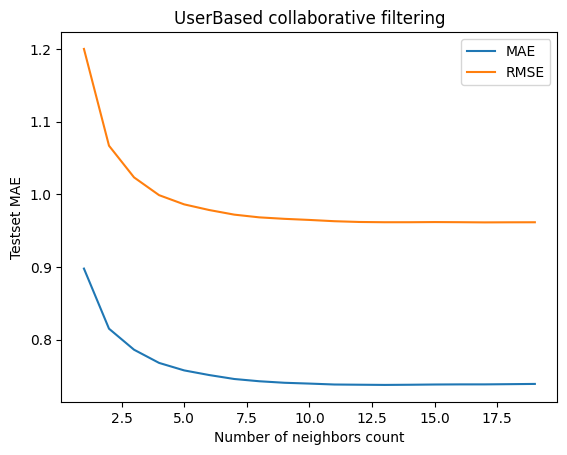

In [33]:
plt.plot(k1,usbc_nn_mae)
plt.plot(k1,usbc_nn_rmse)
plt.xlabel('Number of neighbors count')
plt.ylabel('Testset MAE')
plt.legend(['MAE','RMSE'])
plt.title('UserBased collaborative filtering')
plt.show()


In [34]:
# plt.plot(k1,usbc_nn_rmse)
# plt.xlabel('Number of neighbors count')
# plt.ylabel('Testset RMSE')
# plt.legend(['RMSE'])
# plt.title('UserBased collaborative filtering')
# plt.show()


In [40]:
#finding best K value
k_usbc = usbc_nn_rmse.index(min(usbc_nn_rmse))+1
print('optimum best Value of K for userbased : ', k_usbc)
print('RMSE minimum value: ', min(usbc_nn_rmse))

optimum best Value of K for userbased :  17
RMSE minimum value:  0.9613586736386458


In [25]:
#Item-based CF
itbc_nn_mae = []
itbc_nn_rmse = []
for i in k1:
  itbc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  itbc_nn.fit(trainDaset)
  predictions = itbc_nn.test(testDaset)
  itbc_nn_mae.append(accuracy.mae(predictions))
  itbc_nn_rmse.append(accuracy.rmse(predictions))


Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9731
RMSE: 1.3161
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8748
RMSE: 1.1495
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8339
RMSE: 1.0849
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8125
RMSE: 1.0502
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7954
RMSE: 1.0262
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7837
RMSE: 1.0105
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7772
RMSE: 1.0008
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7707
RMSE: 0.9933
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7652
RMSE: 0.9857
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7608
RMSE: 0.9804
Computing 

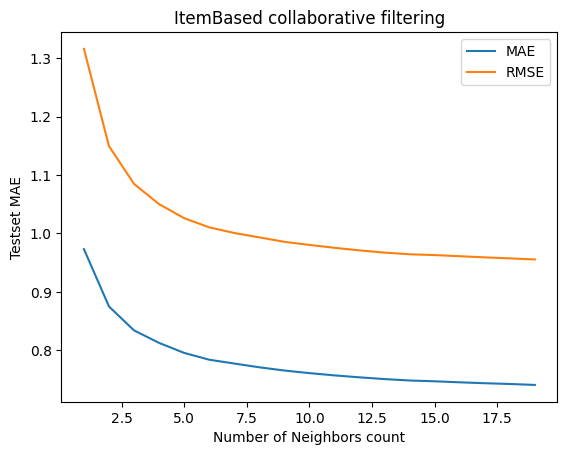

In [35]:
plt.plot(k1,itbc_nn_mae)
plt.plot(k1,itbc_nn_rmse)
plt.xlabel('Number of Neighbors count')
plt.ylabel('Testset MAE')
plt.legend(['MAE','RMSE'])
plt.title('ItemBased collaborative filtering')
plt.show()


In [36]:
# plt.plot(k1,itbc_nn_rmse)
# plt.xlabel('Number of Neighbors count')
# plt.ylabel('Testset RMSE')
# plt.legend(['RMSE'])
# plt.title('ItemBased collaborative filtering')
# plt.show()

In [39]:
#finding best k
k_itbc = itbc_nn_rmse.index(min(itbc_nn_rmse))+1
print('Best Value of K for Itembased: ', k_itbc)
print('Minimum RMSE : ', min(itbc_nn_rmse))

Best Value of K for Itembased:  19
Minimum RMSE :  0.9554127077157523
